In [1]:
# Importar as bibliotecas
import matplotlib.pyplot as plt
import pymannkendall as mk
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
data = pd.read_csv("/home/darkcover/Documentos/Out/dados/data_final.csv")
data.head()

,Unnamed: 0,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
0,0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,0.0,1.0,0.0,1.41,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,1.0,0.0,1.0,0.0,3.10,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,1.0,0.0,0.0,0.0,1.22,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.0,1.0,0.0,1.0,0.0,8.19,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = data.drop(columns=['Unnamed: 0'])
# Excluir a linha com índice 0
data = data.drop(0).reset_index(drop=True)

data.head()

,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
0,1.0,1.0,0.0,1.0,0.0,1.41,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,0.0,3.10,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,0.0,0.0,0.0,1.22,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,0.0,1.0,0.0,8.19,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,1.0,0.0,62.14,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,100000.000000,41.061810,0.017770,0.757269,6.045260,11.155112,6.235671,6.235721,6.235557,6.235370,6.234993,6.234287,6.232993,6.230508,6.225570,6.215621
std,57734.882581,22.424635,0.132115,0.428735,4.243415,365.286564,3.057063,3.057059,1.360935,0.958711,0.678989,0.484534,0.359524,0.297884,0.301503,0.371493
min,1.000000,1.000000,0.000000,0.000000,-9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.500000,22.000000,0.000000,1.000000,3.000000,1.310000,4.000000,4.000000,5.200000,5.600000,5.750000,5.925000,6.012500,6.068750,6.115625,6.154687
50%,100000.000000,44.000000,0.000000,1.000000,6.000000,1.960000,6.000000,6.000000,6.200000,6.200000,6.250000,6.225000,6.237500,6.237500,6.234375,6.232812
75%,149999.500000,59.000000,0.000000,1.000000,9.000000,3.930000,9.000000,9.000000,7.200000,6.900000,6.700000,6.550000,6.462500,6.393750,6.353125,6.315625
max,199999.000000,80.000000,1.000000,1.000000,14.000000,101085.730000,11.000000,11.000000,11.000000,10.200000,9.150000,8.950000,7.637500,7.162500,6.928125,6.729687


In [5]:
print("LEVEL")
# Garanta que 'level' seja do tipo inteiro
data['level'] = data['level'].astype(int)

# Verifique os valores únicos em 'level'
unique_classes1 = data['level'].unique()
print(unique_classes1)

print("APOSTAR")
# Garanta que 'apostar' seja do tipo inteiro
data['apostar'] = data['apostar'].astype(int)

# Verifique os valores únicos em 'apostar'
unique_classes2 = data['apostar'].unique()
print(unique_classes2)

print("ACERTO")
# Garanta que 'acerto' seja do tipo inteiro
data['acerto'] = data['acerto'].astype(int)

# Verifique os valores únicos em 'acerto'
unique_classes3 = data['acerto'].unique()
print(unique_classes3)

print("CONTAGEM")
# Garanta que 'contagem' seja do tipo inteiro
data['contagem'] = data['contagem'].astype(int)

# Verifique os valores únicos em 'contagem'
unique_classes4 = data['contagem'].unique()
print(unique_classes4)

print("ODD_ENTRADA")
# Garanta que 'odd_entrada' seja do tipo inteiro
data['odd_entrada'] = data['odd_entrada'].astype(int)

# Verifique os valores únicos em 'odd_entrada'
unique_classes5 = data['odd_entrada'].unique()
print(unique_classes5)

print("ODD_SAIDA")
# Garanta que 'odd_saida' seja do tipo inteiro
data['odd_saida'] = data['odd_saida'].astype(int)

# Verifique os valores únicos em 'odd_saida'
unique_classes6 = data['odd_saida'].unique()
print(unique_classes6)

LEVEL
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80]
APOSTAR
[0 1]
ACERTO
[1 0]
CONTAGEM
[ 0  1  2 -1 -3 -5 -4 -2  3  4  5  6  7  8  9 10 11 12 13 14 -7 -6 -8 -9]
ODD_ENTRADA
[ 1  4  8  3 10 11  5  6  7  9  2]
ODD_SAIDA
[ 4  8  3 10 11  5  6  7  9  1  2]


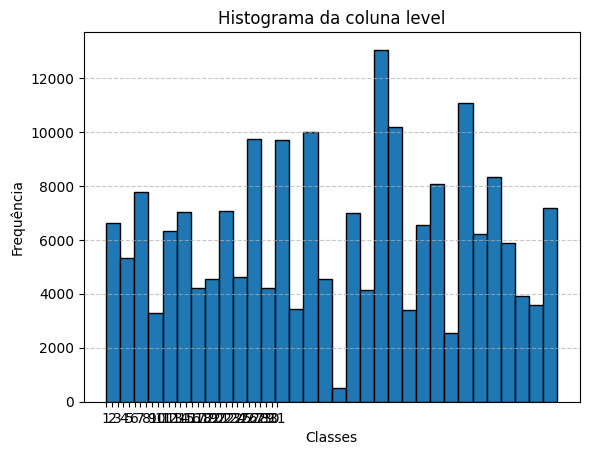

In [6]:
# Configurar o histograma
plt.hist(data['level'], bins=32, edgecolor='k')  # O número de bins deve corresponder ao número de classes (32 no seu caso)
plt.title('Histograma da coluna level')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 32))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


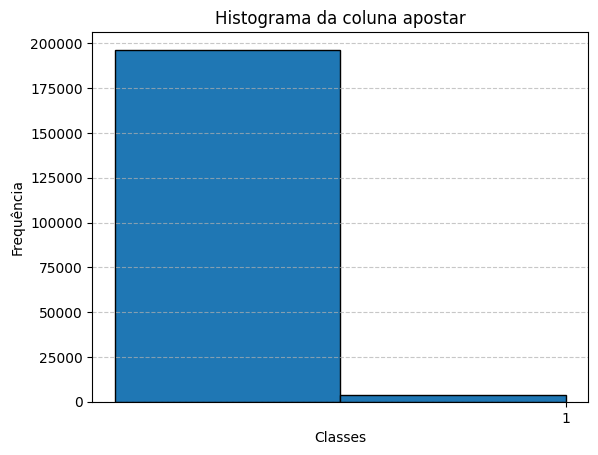

In [7]:
# Configurar o histograma
plt.hist(data['apostar'], bins=2, edgecolor='k')  # O número de bins deve corresponder ao número de classes (2 no seu caso)
plt.title('Histograma da coluna apostar')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 2))  # Rótulos do eixo x de 1 a 2
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


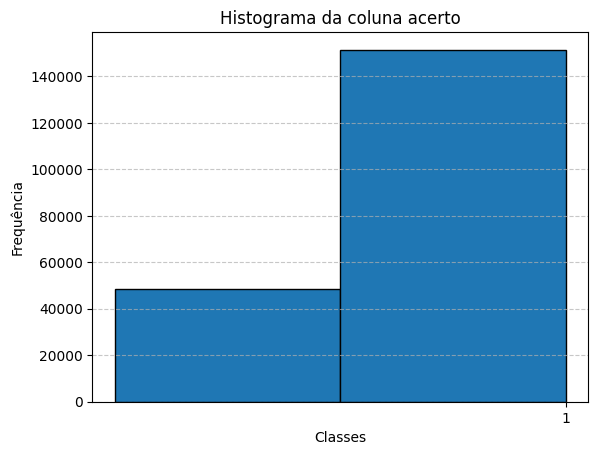

In [9]:
# Configurar o histograma
plt.hist(data['acerto'], bins=2, edgecolor='k')  # O número de bins deve corresponder ao número de classes (3 no seu caso)
plt.title('Histograma da coluna acerto')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 2))  # Rótulos do eixo x de 1 a 3
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


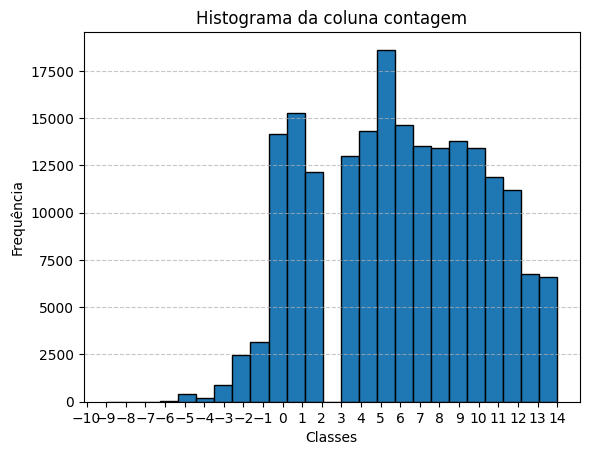

In [10]:
# Configurar o histograma
plt.hist(data['contagem'], bins=25, edgecolor='k')  # O número de bins deve corresponder ao número de classes (25 no seu caso)
plt.title('Histograma da coluna contagem')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(-10, 15))  # Rótulos do eixo x de -10 a 15
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


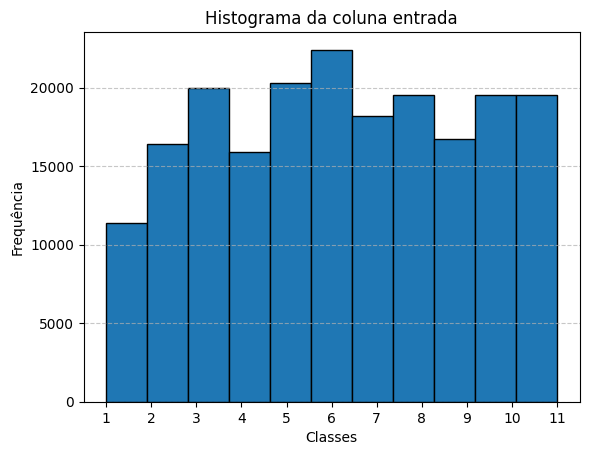

In [10]:
# Configurar o histograma
plt.hist(data['odd_entrada'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna entrada')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


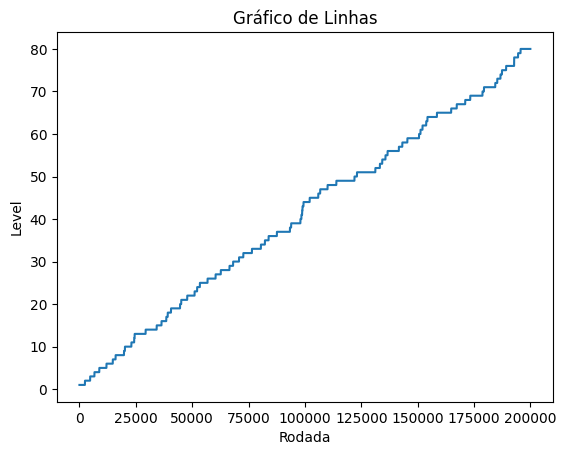

In [11]:
# Dados para o gráfico
x = data['Rodada']
y = data['level']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Level')

# Exibir o gráfico
plt.show()


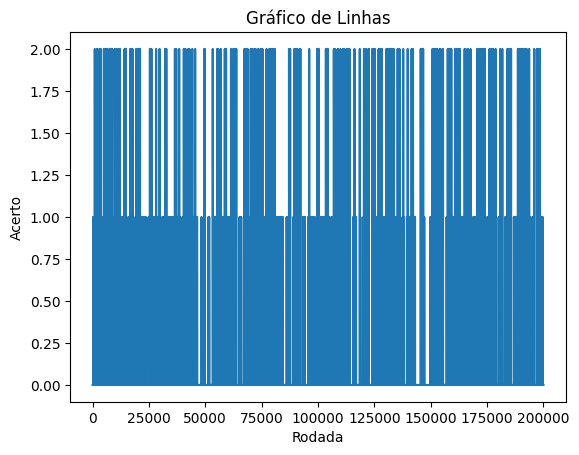

In [12]:
# Dados para o gráfico
x = data['Rodada']
y = data['acerto']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Acerto')

# Exibir o gráfico
plt.show()


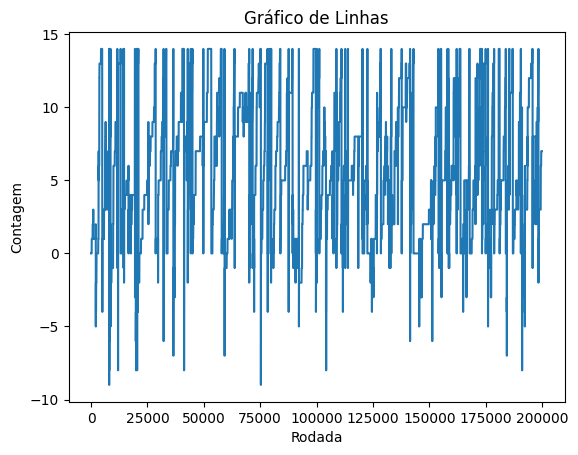

In [13]:
# Dados para o gráfico
x = data['Rodada']
y = data['contagem']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()


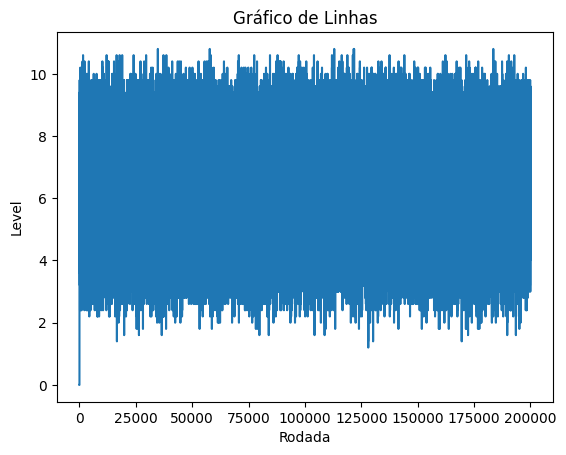

In [14]:
# Dados para o gráfico
x = data['Rodada']
y = data['media5']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media5')

# Exibir o gráfico
plt.show()


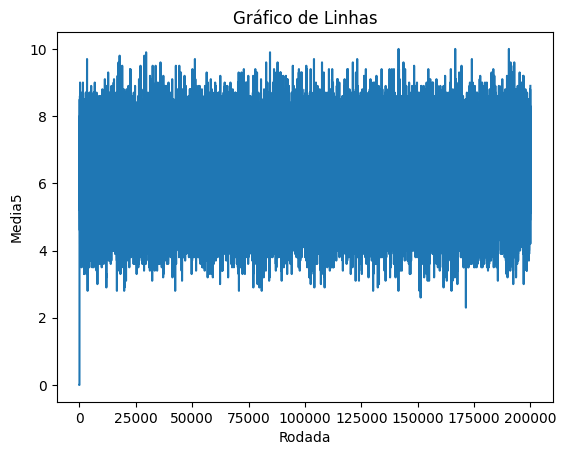

In [15]:
# Dados para o gráfico
x = data['Rodada']
y = data['media10']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media10')

# Exibir o gráfico
plt.show()


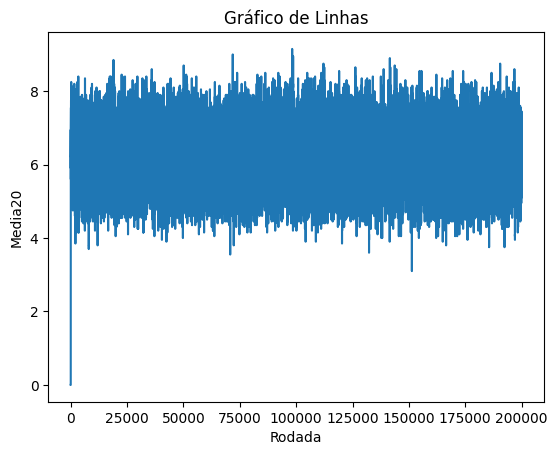

In [16]:
# Dados para o gráfico
x = data['Rodada']
y = data['media20']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media20')

# Exibir o gráfico
plt.show()


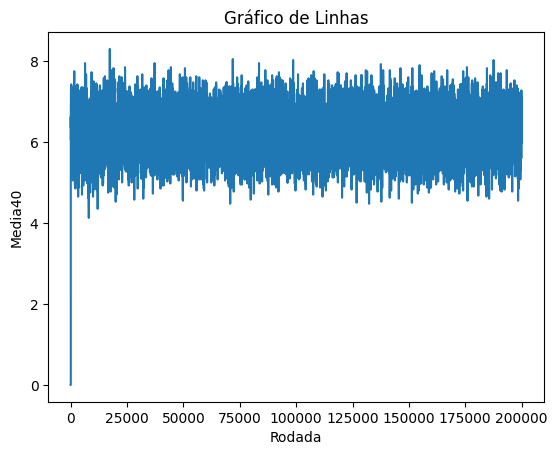

In [17]:
# Dados para o gráfico
x = data['Rodada']
y = data['media40']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media40')

# Exibir o gráfico
plt.show()


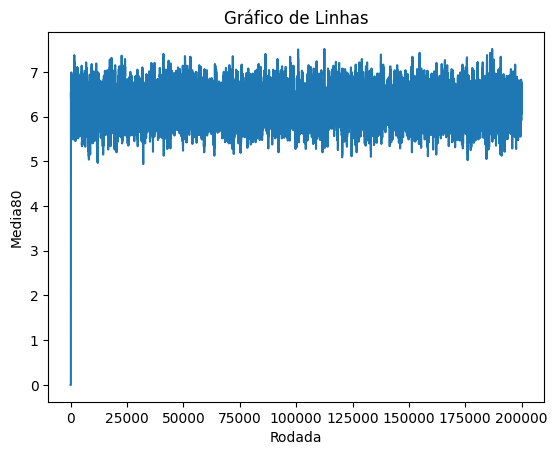

In [18]:
# Dados para o gráfico
x = data['Rodada']
y = data['media80']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media80')

# Exibir o gráfico
plt.show()


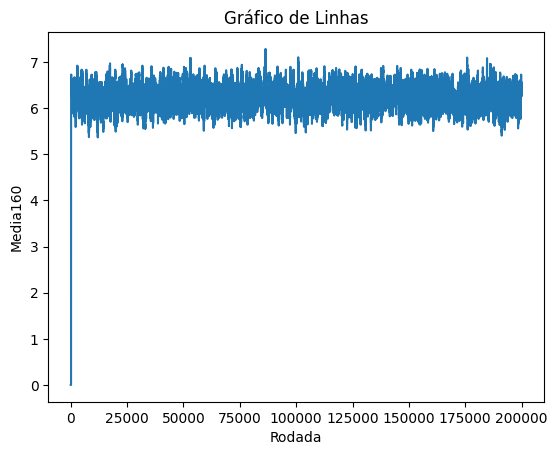

In [19]:
# Dados para o gráfico
x = data['Rodada']
y = data['media160']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media160')

# Exibir o gráfico
plt.show()


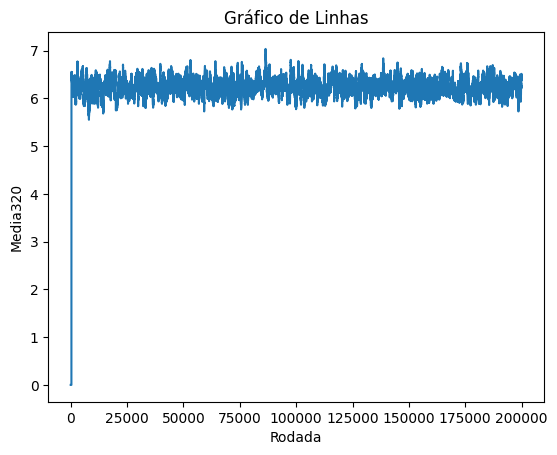

In [20]:
# Dados para o gráfico
x = data['Rodada']
y = data['media320']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media320')

# Exibir o gráfico
plt.show()


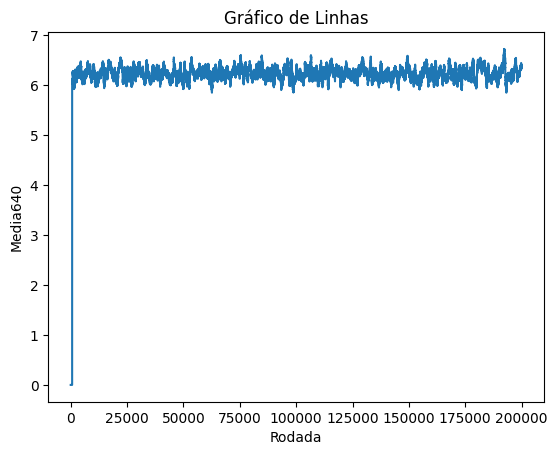

In [12]:
# Dados para o gráfico
x = data['Rodada']
y = data['media640']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media640')

# Exibir o gráfico
plt.show()


In [24]:
data = data.tail(20000).reset_index(drop=True)

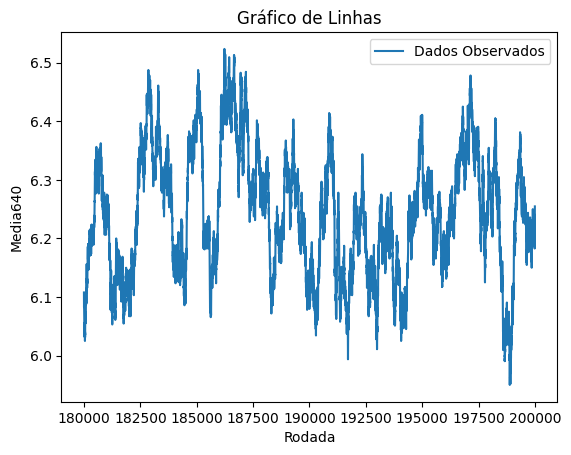

In [25]:
x = data['Rodada']
y = data['media640']

# Criar o gráfico de linhas
plt.plot(x, y, label='Dados Observados')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media640')
plt.legend()
plt.show()

# Teste de Tendência (Mann-Kendall)
result = mk.original_test(y)
print("Resultado do Teste de Mann-Kendall:")
print(result)

# Ajustar uma linha de tendência (Regressão Linear)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plotar os dados e a linha de tendência
plt.plot(x, y, label='Dados Observados')
plt.plot(x, line, color='red', label='Linha de Tendência')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas com Tendência')
plt.xlabel('Rodada')
plt.ylabel('Media640')
plt.legend()
plt.show()

# Exibir informações sobre a linha de tendência
print(f"Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Std_err: {std_err}")


        Unnamed: 0    Rodada  level  apostar  acerto  contagem    odd  \
0                1       1.0    1.0      0.0     1.0       0.0   1.41   
1                2       2.0    1.0      0.0     1.0       0.0   3.10   
2                3       3.0    1.0      0.0     0.0       0.0   1.22   
3                4       4.0    1.0      0.0     1.0       0.0   8.19   
4                5       5.0    1.0      0.0     1.0       0.0  62.14   
...            ...       ...    ...      ...     ...       ...    ...   
199994      199995  199995.0   80.0      0.0     1.0       8.0  48.36   
199995      199996  199996.0   80.0      0.0     1.0       8.0   1.71   
199996      199997  199997.0   80.0      0.0     0.0       8.0   1.09   
199997      199998  199998.0   80.0      0.0     1.0       8.0   1.76   
199998      199999  199999.0   80.0      0.0     1.0       8.0  78.80   

        odd_entrada  odd_saida  media5  media10  media20  media40  media80  \
0               1.0        4.0     0.0      0

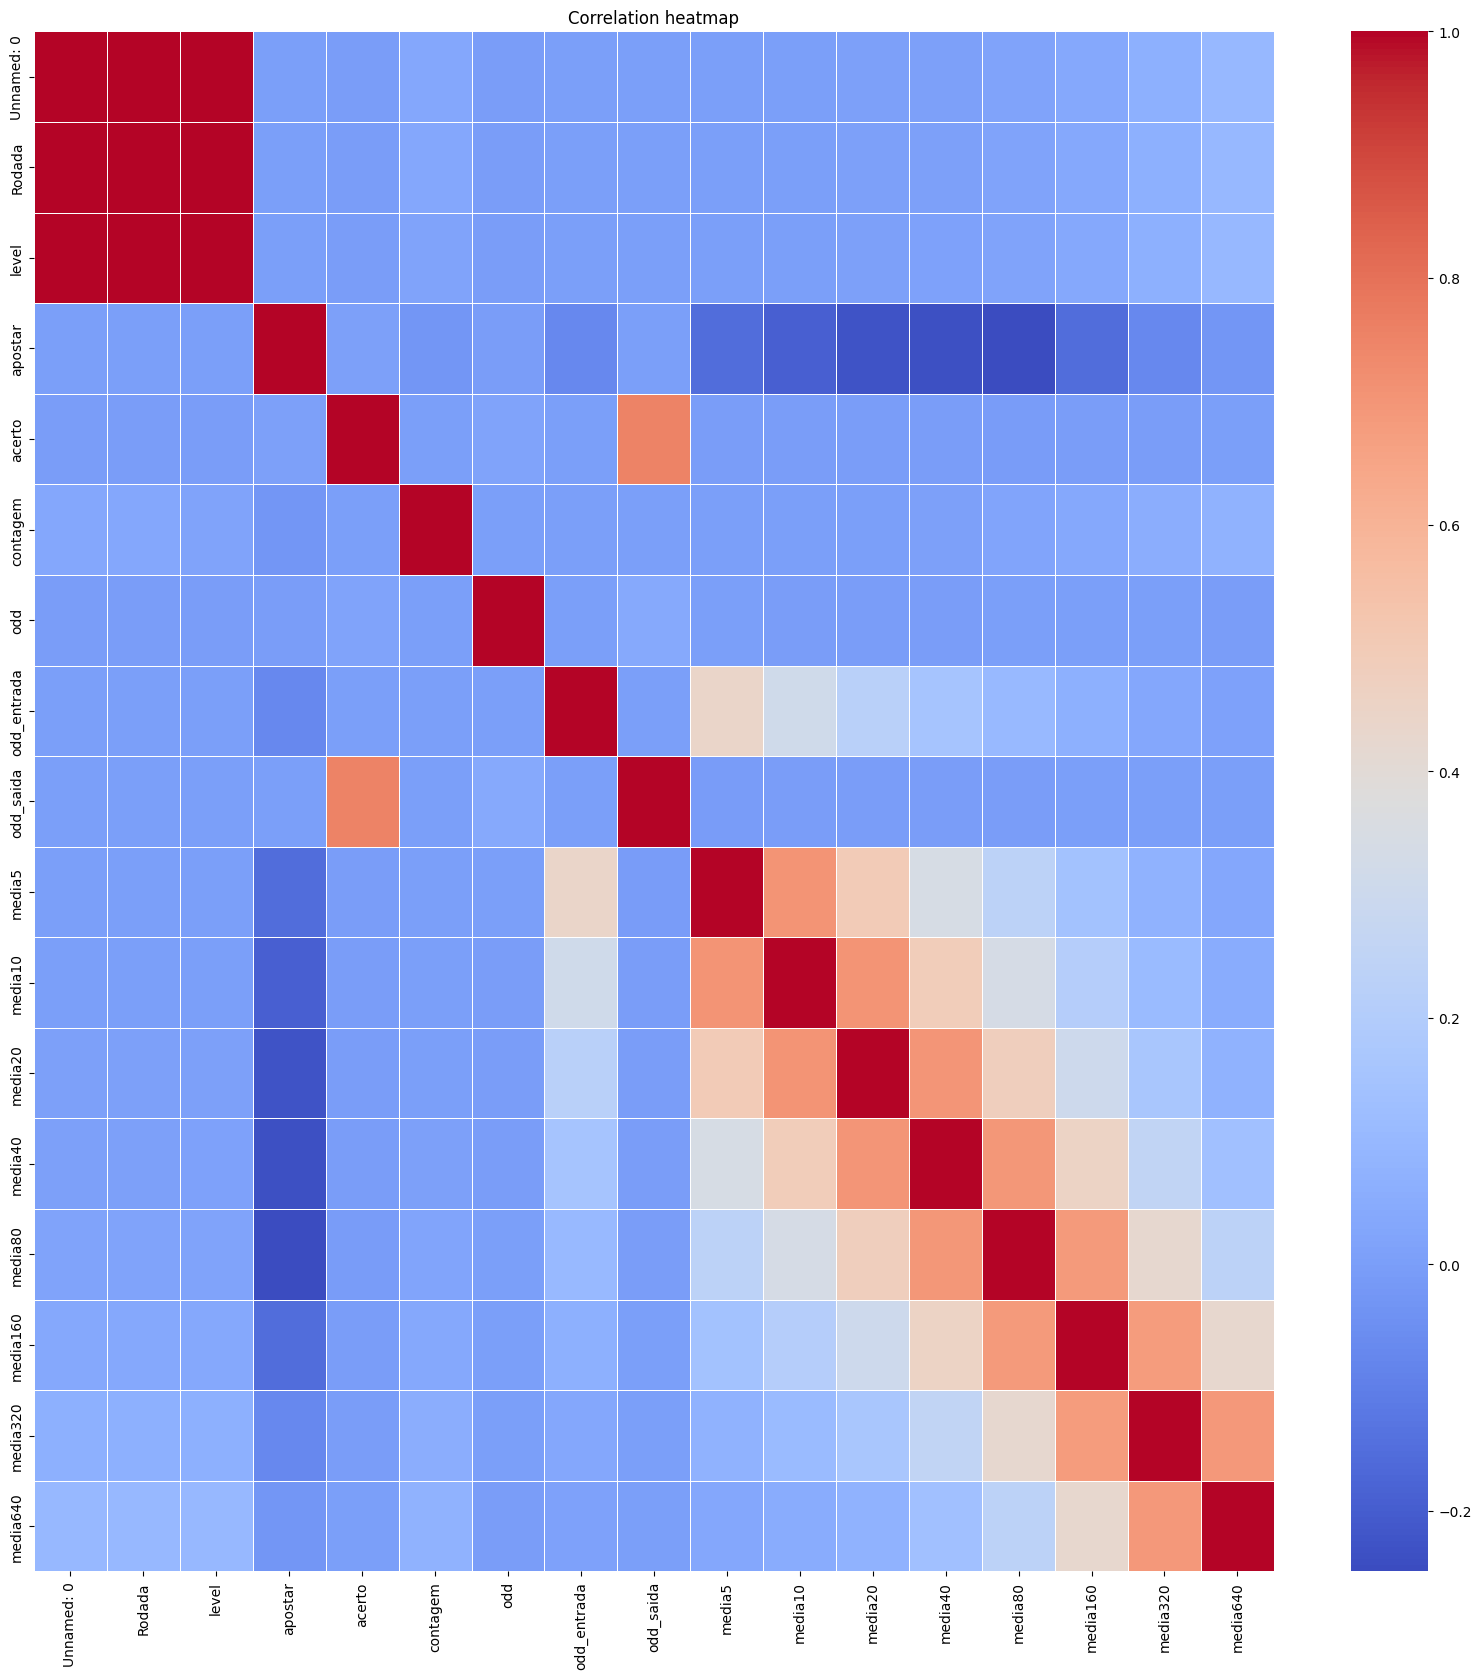

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/home/darkcover/Documentos/Out/dados/data_final.csv')

#data = data.drop(columns=['Unnamed: 0'])
data = data.rename(columns={'Odd_Categoria': 'odd_saida'})

data = data.drop(0).reset_index(drop=True)


print(data)


i, j, k, l = 0,0,0,0
for (apostar, acerto) in zip(data['apostar'], data['acerto']):
    #Não apostar e acertar
    if apostar == 0 and acerto == 1:
        i += 1
    #Não apostar e errar
    elif apostar == 0 and acerto == 0:
        j += 1
    #Apostar e acertar
    elif apostar == 1 and acerto == 1:
        k += 1
    #Apostar e errar
    elif apostar == 1 and acerto == 0:
        l += 1



matriz_confusa = np.array([
    [i, j],
    [k, l],
])

matriz_confusa_ponderada = np.array([
    [i/199999, j/199999],
    [k/199999, l/199999],
])
soma = i + j + k + l
apostas = k + l
acertos = k / apostas
erros = l / apostas
print(f'Matriz de Confusão: \n {matriz_confusa}\nMatriz de confusão ponderada: \n {matriz_confusa_ponderada} \nPonderada em relação as apostas:\n {acertos, erros} \nQuantidade de entradas totais: {soma}')

# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()